<a href="https://colab.research.google.com/github/chirazkahla/TP-VI/blob/main/TP_V3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00492/Metro_Interstate_Traffic_Volume.csv.gz"
df = pd.read_csv(url, compression='gzip')

df.head()


,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,NaN,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,NaN,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,NaN,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,NaN,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,NaN,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [ ]:
df.info()
df.describe(include='all')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              61 non-null     object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
count,61,48204.000000,48204.000000,48204.000000,48204.000000,48204,48204,48204,48204.000000
unique,11,NaN,NaN,NaN,NaN,11,38,40575,NaN
top,Labor Day,NaN,NaN,NaN,NaN,Clouds,sky is clear,2013-04-18 22:00:00,NaN
freq,7,NaN,NaN,NaN,NaN,15164,11665,6,NaN
mean,NaN,281.205870,0.334264,0.000222,49.362231,NaN,NaN,NaN,3259.818355
std,NaN,13.338232,44.789133,0.008168,39.015750,NaN,NaN,NaN,1986.860670
min,NaN,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,0.000000
25%,NaN,272.160000,0.000000,0.000000,1.000000,NaN,NaN,NaN,1193.000000
50%,NaN,282.450000,0.000000,0.000000,64.000000,NaN,NaN,NaN,3380.000000
75%,NaN,291.806000,0.000000,0.000000,90.000000,NaN,NaN,NaN,4933.000000


In [ ]:
df.isnull().sum()


,0
holiday,48143
temp,0
rain_1h,0
snow_1h,0
clouds_all,0
weather_main,0
weather_description,0
date_time,0
traffic_volume,0


In [ ]:
traffic_mean = df['traffic_volume'].mean()
traffic_median = df['traffic_volume'].median()
traffic_mode = df['traffic_volume'].mode()[0]
traffic_std = df['traffic_volume'].std()
traffic_range = df['traffic_volume'].max() - df['traffic_volume'].min()

print(f"Mean: {traffic_mean}")
print(f"Median: {traffic_median}")
print(f"Mode: {traffic_mode}")
print(f"Standard Deviation: {traffic_std}")
print(f"Range: {traffic_range}")


Mean: 3259.8183553232097
Median: 3380.0
Mode: 353
Standard Deviation: 1986.8606704463552
Range: 7280


إذا كان المتوسط أكبر من الوسيط → البيانات مائلة يمينًا (skewed right).

إذا كان المتوسط ≈ الوسيط → التوزيع متناظر.

In [ ]:
from scipy.stats import skew, kurtosis

print("Skewness:", skew(df['traffic_volume']))
print("Kurtosis:", kurtosis(df['traffic_volume']))


Skewness: -0.08937857006592761
Kurtosis: -1.3090768978229412


skew() → يخبرك إن كانت البيانات مائلة (يمين أو يسار).

موجبة = مائلة لليمين (قيم كبيرة أكثر).

سالبة = مائلة لليسار.

kurtosis() → يخبرك إن كانت التوزيعات حادة أو مسطحة مقارنة بالتوزيع الطبيعي.

0 → ذيول ثقيلة (leptokurtic)

< 0 → ذيول خفيفة (platykurtic)

In [ ]:
weather_group = df.groupby('weather_main')['traffic_volume'].agg(['mean', 'std']).sort_values(by='mean', ascending=False)
weather_group


,mean,std
weather_main,,
Clouds,3618.449749,1906.202879
Haze,3502.101471,1873.511057
Rain,3317.905501,1982.228705
Drizzle,3290.727073,1997.901830
Smoke,3237.650000,1978.015893
Clear,3055.908819,1987.101411
Snow,3016.844228,1900.185883
Thunderstorm,3001.620890,1988.296012
Mist,2932.956639,2073.025670


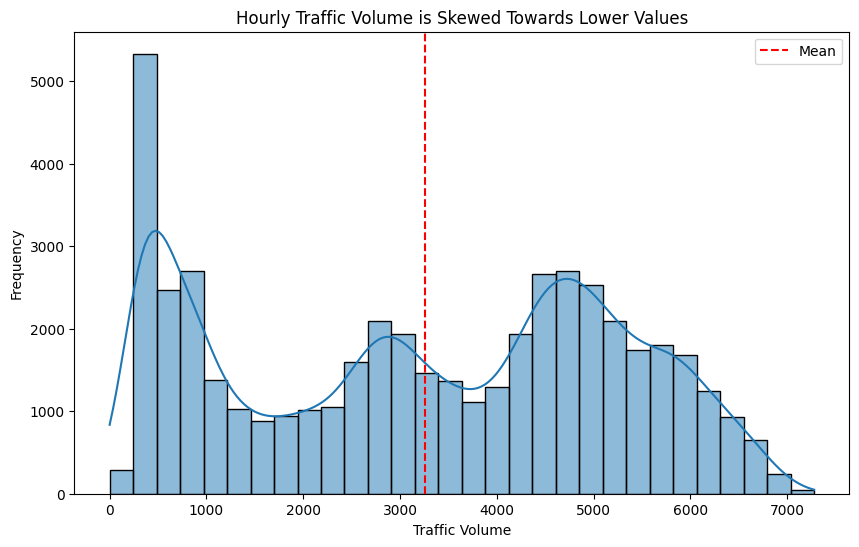

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.histplot(df['traffic_volume'], bins=30, kde=True)
plt.axvline(traffic_mean, color='red', linestyle='--', label='Mean')
plt.title("Hourly Traffic Volume is Skewed Towards Lower Values")
plt.xlabel("Traffic Volume")
plt.ylabel("Frequency")
plt.legend()
plt.show()


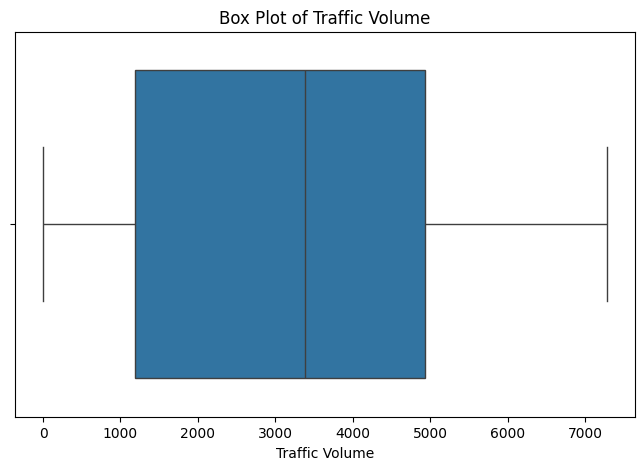

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(x=df['traffic_volume'])
plt.title("Box Plot of Traffic Volume")
plt.xlabel("Traffic Volume")
plt.show()


In [ ]:
Q1 = df['traffic_volume'].quantile(0.25)
Q3 = df['traffic_volume'].quantile(0.75)
IQR = Q3 - Q1
print("IQR:", IQR)


IQR: 3740.0


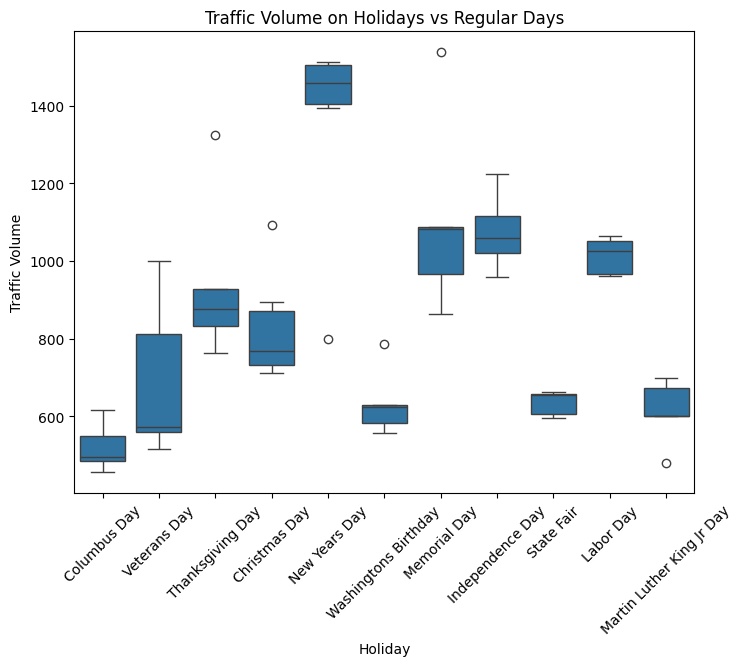

In [ ]:
plt.figure(figsize=(8,6))
sns.boxplot(x='holiday', y='traffic_volume', data=df)
plt.title("Traffic Volume on Holidays vs Regular Days")
plt.xlabel("Holiday")
plt.ylabel("Traffic Volume")
plt.xticks(rotation=45)

plt.show()


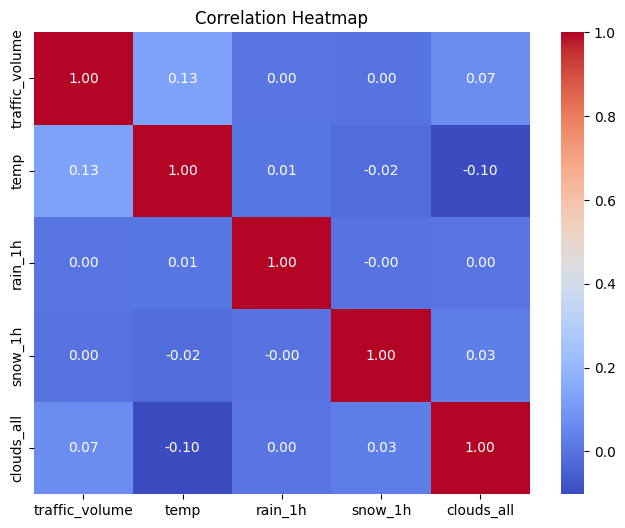

In [ ]:
corr = df[['traffic_volume', 'temp', 'rain_1h', 'snow_1h', 'clouds_all']].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


In [ ]:
import plotly.express as px

fig = px.scatter(df, x='temp', y='traffic_volume', color='weather_main',
                 hover_data=['weather_main'],
                 title="Traffic Volume Tends to Dip in Extreme Temperatures, Regardless of Rain/Snow")
fig.show()
